In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_path = 'datasets/train/'
test_path = 'datasets/test/'

In [3]:
haarcascade_face = 'datasets/haarcascade_frontalface_default.xml'

In [4]:
def detect_face(input_img):
    image = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
    
    face_cascade = cv2.CascadeClassifier(haarcascade_face)
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=5)
    
    if len(faces) == 0:
        return -1, -1
    (x, y, w, h) = faces[0]
    
    return image[y:y+w, x:x+h], faces[0]

In [5]:
def prepare_training_data(train_path):
    detected_faces = []
    face_labels = []
    
    train_image_dirs = os.listdir(train_path)
    for dir_name in train_image_dirs:
        label = int(dir_name)
        train_image_path = train_path + "/" + dir_name
        train_image_names = os.listdir(train_image_path)
        
        for image_name in train_image_names:
            image_path = train_image_path + "/" + image_name
            image = cv2.imread(image_path)
            face, rect = detect_face(image)
            resized_face = cv2.resize(face, (120, 120), interpolation = cv2.INTER_AREA)
            
            detected_faces.append(resized_face)
            face_labels.append(label)
            
    return detected_faces, face_labels

In [7]:
print("Total faces: ", len(detected_faces))
print("Total Labels: ", len(face_labels))

Total faces:  93
Total Labels:  93


In [6]:
detected_faces, face_labels = prepare_training_data(train_path)

In [8]:
eigenfaces_recognizer = cv2.face.EigenFaceRecognizer_create()

In [9]:
eigenfaces_recognizer.train(detected_faces, np.array(face_labels))

In [10]:
def draw_rectangle(test_img, rect):
    x, y, w, h = rect
    cv2.rectangle(test_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    

In [11]:
def write_text(test_img, label_text, x, y):
    cv2.putText(test_img, tag_names[label_text], (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0,255,0), 2)


In [12]:
tags = ['0', '1', '2', '3', '4']

In [13]:
tag_names ={'0': 'Ben Afflek',
          '1': 'Elton John',
          '2': 'Jerry Seinfield',
          '3': 'Madonna',
          '4': 'Mindy Kaling'}

In [14]:
def predict(test_img):
    detected_face, rect = detect_face(test_img)
    resized_test_img = cv2.resize(detected_face, (120, 120), interpolation = cv2.INTER_AREA)
    
    label, confidence = eigenfaces_recognizer.predict(resized_test_img)
    
    label_text = tags[label]
    draw_rectangle(test_img, rect)
    write_text(test_img, label_text, rect[0], rect[1]-5)
    
    return test_img, label_text, confidence

In [26]:
real_label = '0'
test_img = cv2.imread(test_path+real_label+'/3.jpg')

In [27]:
pred_img, pred_label, confidence = predict(test_img)
print('Confidence: ',confidence)

Confidence:  826.0809899861987


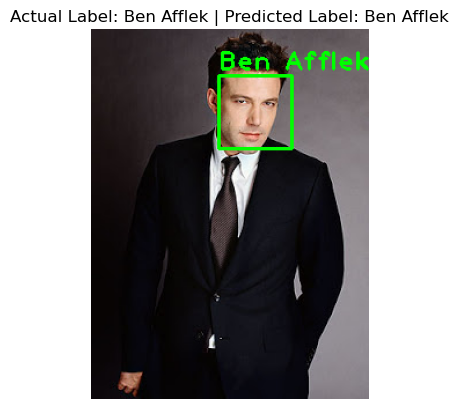

In [28]:
plt.imshow(cv2.cvtColor(pred_img, cv2.COLOR_RGB2BGR))
plt.title('Actual Label: '+tag_names[real_label]+' | '+'Predicted Label: '+ tag_names[pred_label])
plt.axis('off')
plt.show()